In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

$$(i) \frac{\partial s}{\partial t} = k\frac{\partial^2 s}{\partial x^2} +\frac{Q}{A}\frac{\partial s}{\partial x}$$

$$(ii) \frac{\partial \zeta}{\partial t} = \kappa \frac{\partial^2 \zeta}{\partial r^2} + \frac{1}{r} \left (\kappa-\frac{Q}{\pi D} \right )\frac{\partial \zeta}{\partial r}$$

In [7]:
Q = 150  # m/s^3
A = 2000 # m^2
k = 400
kappa = k
R = 10000
L = 10000

pi = np.pi

D = 1

a = A/(pi*D)

 ## Steady-state  
   
for i: $$ 0 = k\frac{\partial^2 \tilde{s}}{\partial x^2} +\frac{Q}{A} \frac{\partial \tilde{s}}{\partial x} $$
such that $$\tilde{s}(x) = \gamma_1 e^{-\frac{Q}{kA}x} + \gamma_2$$

for ii: $$ 0 = \kappa \frac{\partial^2 \tilde{\zeta}}{\partial r^2} + \frac{1}{r}\left(\kappa - \frac{Q}{\pi} \right )\frac{\partial \tilde{\zeta}}{\partial r}$$
such that $$\tilde{\zeta}(r) = \gamma_3 \left(  \frac{r}{R}\right)^{Q/\kappa \pi} + \gamma_4$$
 
  
Finally by using the boundary conditions we find:
$$\tilde{s}(x) = \left(\frac{a}{R}\right)^{Q/\kappa \pi} e^{-\frac{Q}{kA}x}$$
$$\tilde{\zeta}(r) = \left(  \frac{r}{R}\right)^{Q/\kappa \pi}$$

In [8]:
def s_tilde(x):
    return (a/R)**(Q/(kappa*pi))*np.exp(-Q*x/(k*A))

def zeta_tilde(r):
    return (r/R)**(Q/(kappa*pi))

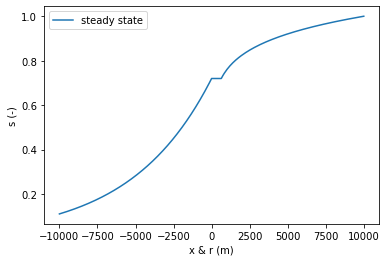

In [9]:
x = np.linspace(0,L,int(1e3))
r = np.linspace(a,R,int(1e2))

ax = np.append(-x[::-1],r)

s0 = [s_tilde(x) for x in x][::-1] + [zeta_tilde(r) for r in r]


plt.figure()
plt.plot(ax,s0, label='steady state')
plt.xlabel('x & r (m)')
plt.ylabel('s (-)')
#plt.vlines(B,0,1, color='black')
plt.legend()
plt.show()

## Non-steady state ($\zeta$)
Let's first consider the non-steady state of the radial part with two non-homogenous boundary conditions.
Then for ii: $$\frac{\partial \zeta}{\partial t} = \kappa \frac{\partial^2 \zeta}{\partial r^2} + \frac{1}{r} \left (\kappa-\frac{Q}{\pi D} \right )\frac{\partial \zeta}{\partial r}$$
The boundary conditions are 
$$\begin{aligned} \zeta(R) &= 1  \\
\zeta(a) &= f(t)\end{aligned}$$


We now consider $$\zeta(r,t) = v(r,t) + \psi(r,t)$$  with $\psi$ chosen such that the boundary conditions become homogenous $$\psi(r,t) = \frac{f(t)-1}{a-R}r + \frac{Rf(t) -a}{R-a}$$

The the equation for $v$ is: $$ v_t = \kappa v_{rr} + \frac{1}{r} \left(\kappa -\frac{Q}{\pi D}\right) v_r + \left[ -\psi_t + \kappa \psi_{rr} + \frac{1}{r} \left(\kappa -\frac{Q}{\pi D}\right) \psi_r \right]$$

which we rewrite as $$ v_t = \kappa v_{rr} + \frac{c}{r} v_r + H(r,t)$$ where the boundary conditions for $v$ are homogenous.

### Eigenvalue problem
The Eigenvalue problem related to this PDE is:
$$ \kappa \phi_{rr} + \frac{c}{r} \phi_r = -\lambda \phi$$
Now a true mathematician would work out the series solution using the method of Frobenius. I however use wolfram_alpha to give me:
$$\phi(r) = d_1 r^{\frac{\kappa -c}{2\kappa}} J_{\frac{c-\kappa}{2\kappa}}\left(\sqrt{\frac{\lambda}{\kappa}}r \right) +  d_2 r^{\frac{\kappa -c}{2\kappa}} Y_{\frac{c-\kappa}{2\kappa}}\left(\sqrt{\frac{\lambda}{\kappa}}r\right)$$  
  


### Eigenfunction expansion
Now that we have the eigenfunctions we can use eigenfunction expansion:
$$v(r,t) = \sum_{n=1}^{\infty}T_n(t) \phi_n(r)$$
  
By filling this in into the equation, justifying differentiation by homogeneity of the boundary conditions, and integrating from $r=a$ to $r=R$, using (ASSUMED) orthogonality:

$$\frac{dT_n}{dt} = -\lambda_n T_n(t) + \int_{r=a}^R H(r,t) \phi_n(r) dr \cdot \left( \int_{r=a}^R \phi_n(r)^2 dr \right)^{-1}$$ resulting in $$T_n(t) = e^{-\lambda_n t} T_n(0) + e^{-\lambda_n t} \int_{0}^{t} h_n(\tau)e^{\lambda_n \tau} d\tau$$
where $T_n(0) = \int v(r,0) \phi_n(r) dr$

## Non-steady state ($s$)
Let's now consider the non-steady state of the river part in $x$ with two non-homogenous boundary conditions.
Then for i: $$\frac{\partial s}{\partial t} = k\frac{\partial^2 s}{\partial x^2} +\frac{Q}{A}\frac{\partial s}{\partial x}$$

The boundary conditions are 
$$\begin{aligned} s(L) &= 0  \\
s(0) &= f(t)\end{aligned}$$



We now consider $$s(x,t) = u(x,t) + \xi(x,t)$$  with $\xi$ chosen such that the boundary conditions become homogenous $$\xi(x,t) = f(t) \left( 1-\frac{x}{L} \right)$$

The the equation for $u$ is: $$ u_t = k u_{xx} + \frac{Q}{A} u_x + \left[ -\xi_t + k \xi_{xx} + \frac{Q}{A} \xi_x \right]$$

which we rewrite as $$ u_t = k u_{xx} + \frac{Q}{A} u_x + L(x,t)$$ where the boundary conditions for $v$ are homogenous.

### Eigenvalue problem
The Eigenvalue problem related to this PDE is:
$$ k \phi_{xx} + \frac{Q}{A} \phi_x = -\lambda \phi$$
This is exercise 5.3.4 in Haberman:

$$\phi_n(x) = e^{-\frac{Q}{2kA}x} \sin \left(\frac{n \pi x}{L} \right)$$  

with $$\lambda_n = \frac{(Q/A)^2}{4k} + k\left(\frac{n\pi}{L}\right)^2$$
### Eigenfunction expansion
Now that we have the eigenfunctions we can use eigenfunction expansion:
$$u(x,t) = \sum_{n=1}^{\infty}T_n(t) \phi_n(x)$$
  
-> GALERKIN

# Coupling on the boundary

In determining the solutions above, we assumed the salinity at the boundary is given by $f(t)$. However, this function is not known. Using the other (transport) coupling condition we solve for $f(t)$.  
  
Recall the coupling condition:
$$ks_x(0) = \kappa \zeta_r(a) $$
when the surfaces are chosen equally.

$$\begin{aligned} 
s_x(0) &= \frac{\partial}{\partial x} \left[ \sum_{n=0}^{\infty}T_n(t) \phi_n(x) + \xi(x,t) \right]\\
&= -\frac{f(t)}{L} + \sum_{n=0}^{\infty} T_n(t) \phi_n'(0)\\
\end{aligned}$$

and 

$$\begin{aligned} 
\zeta_r(a) &= \frac{\partial}{\partial r} \left[ \sum_{n=0}^{\infty}T_n(t) \phi_n(r) + \psi(r,t) \right]\\
&= \frac{f(t)-1}{a-R} + \sum_{n=0}^{\infty} T_n(t) \phi_n'(a)\\
\end{aligned}$$

By seperating $f(t)$ from the equality we obtain:
$$f(t) = \left[\frac{\kappa}{R-a} -\frac{k}{L} \right]^{-1} \left(\kappa \sum_{n=0}^{\infty} T_n(t) \phi_n'(a) + \frac{\kappa}{R-a} - k \sum_{n=0}^{\infty} T_n(t) \phi_n'(0) \right)$$

## WARNING^ T_n depends on f(t)..... so not actually easily separable. This will not be possible I suppose.

In [10]:
from scipy.special import jv
from scipy.special import yv

# def f(t):
#     return 1+0.5*np.sin(t)

# def f_prime(t):
#     return 0.5*np.cos(t)

order = (Q/(pi*D))/(2*kappa)
print(order)

# def H(r,t):
#     psi_t = f_prime(t)*r/(a-R) + R*f_prime(t)/(R-a)
#     psi_rr = 0
#     psi_r = (f(t)-1)/(a-R)
#     return -psi_t + kappa*psi_rr + (kappa-Q/pi)/r*psi_r

# N = 6
# z = np.array([2.5,5,8,12,15,18])

from scipy.optimize import root

0.05968310365946075


### Finding eigenfunctions and -values

In [11]:
order = Q/(2*kappa*pi*D)
def phi_bessel(r,par):
    return (r)**(order)*jv(order, np.sqrt(par[0]/kappa)*(r)) + par[1]*(r)**(order)*yv(order, np.sqrt(par[0]/kappa)*(r))

def phi_frob(r, par):
    labda = par[0]
    d = par[1]
    N = 50
    a1 = np.zeros(N)
    a2 = np.zeros(N)
    a1[0] = 1
    a2[0] = 1

    c = kappa -Q/pi
    r1 = 0
    r2 = (c-kappa)/kappa

    for i in range(2,N,2):
        a1[i] = -labda*a1[i-2]/(kappa*(i+r1)*(i+r1-1) + c*(i+r1))
        a2[i] = -labda*a2[i-2]/(kappa*(i+r2)*(i+r2-1) + c*(i+r2))
    
    y1, y2 = 0,0
    for i in range(N):
        y1 += a1[i]*r**(i+r1)
        y2 += a2[i]*r**(i+r2)
    
    return y1 + d*y2

In [12]:
from scipy.optimize import root

phi_frob_a = lambda x: phi_frob(a,x)
phi_frob_R = lambda x: phi_frob(R,x)
phi_bessel_a = lambda x: phi_bessel(a,x)
phi_bessel_R = lambda x: phi_bessel(R,x)

def func_frob(x):
    return phi_frob_a(x),phi_frob_R(x)

def func_bessel(x):
    return phi_bessel_a(x),phi_bessel_R(x)



def is_new(r,roots):
    temp = True
    for j in range(len(roots)):
        if ( abs(r[0]-roots[j][0])<0.01*abs(r[0]) ) and ( abs(r[1]-roots[j][1])<0.01*abs(r[1]) ):
            temp = False
    return temp

roots_frob = []
roots_bessel = []

# Find roots of frob
print('Frob:')
for i in np.logspace(-10,4,20):
    for j in np.logspace(-10,4,20):
        rt = root(func_frob, x0 =(i,j)).x
        if is_new(rt,roots_frob):
            roots_frob.append(rt)
            #print(rt)

for i in np.linspace(3e-5,1,20):
    for j in np.linspace(-10,10,20):
        rt = root(func_frob, x0 =(i,j)).x
        if is_new(rt,roots_frob):
            roots_frob.append(rt)
            #print(rt)

# Find roots of bessel
print('Bessel:')
for i in np.logspace(-10,-1,20):
    for j in np.linspace(-10,10,20):
        rt = root(func_bessel, x0 =(i,j)).x
        if is_new(rt,roots_bessel):
            roots_bessel.append(rt)
            #print(rt)

for i in np.linspace(3e-5,3e-2,20):
    for j in np.linspace(-10,10,20):
        rt = root(func_bessel, x0 =(i,j)).x
        if is_new(rt,roots_bessel):
            roots_bessel.append(rt)
            #print(rt)


Frob:


KeyboardInterrupt: 

In [ ]:
# r = np.linspace(a,R,100)

# for i in range(len(roots_frob)):
#     plt.figure()
#     plt.title(str(roots_frob[i]))
#     plt.plot(r,phi_frob(r,roots_frob[i]))
#     plt.hlines(0,a,R)
#     plt.show()
    
# for i in range(len(roots_bessel)):
#     plt.figure()
#     plt.title(str(roots_bessel[i]))
#     plt.plot(r,phi_bessel(r,roots_bessel[i]))
#     plt.hlines(0,a,R)
#     plt.show()

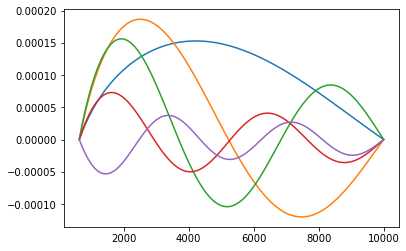

In [19]:
good_roots_frob = np.array([[3.48339649e-05,-2.16393671e+00], #n=0
                            [1.64307692e-04,-2.17458895e+00], #n=1
                            [6.98585599e-04,-2.22566723e+00], #n=2
                            [3.84908565e-04,-2.19417209e+00]]) #n=3

good_roots_bessel = np.array([[3.94030436e-05,7.61848195e-01], #n=0
                              [1.71476791e-04,1.36154281e+00], #n=1
                              [3.94842613e-04,2.49685017e+00], #n=2
                              [7.08883157e-04,6.97900847e+00], #n=3
                              [1.11333787e-03,-1.12220582e+01], #n=4
                              [1.60807412e-03,-3.06309775e+00], #n=5
                              [2.19302e-03,-1.67100131e+00], #n=6
                              [2.86812e-03,-1.05017646e+00], #n=7
                              [3.63335e-03,-0.66912985e+00], #n=8
                              [4.4887e-03,-0.38862351e+00], #n=9
                              [5.43415e-03,-0.15366476e+00], #n=10
                              [6.46968e-03,0.065137e+00], #n=11
                              [7.5953e-03,0.2897497e+00], #n=12
                              [8.81099e-03,0.54445193e+00], #n=13
                              [1.011676e-02,0.86784664e+00], #n=14
                              [1.15126e-02,1.34271697e+00], #n=15
                              [1.29985e-02,2.21252377e+00], #n=16
                              [1.457447e-02,4.71344792e+00], #n=17
                              [1.62405098e-02,-2.61426615e+02], #n=18
                              [1.799661e-02,-4.44488786e+00]]) #n=20

def cov_frob_bessel(roots):
    """Zouden de roots niet gelijk moeten zijn?"""
    return 

rho = [integrate.quad(lambda r: phi_bessel(r, good_roots_bessel[i])**2, a, R)[0] for i in range(len(good_roots_bessel))]

r = np.linspace(a,R, 100)


plt.figure()
for i in range(5):
    plt.plot(r, phi_bessel(r,good_roots_bessel[i])/rho[i])
plt.show()
    

## Solving for $f(t)$  

$$f(t) = \left[\frac{\kappa}{R-a} -\frac{k}{L} \right]^{-1} \left(\kappa \sum_{n=0}^{\infty} T_n(t) \phi_n'(a) + \frac{\kappa}{R-a} - k \sum_{n=0}^{\infty} T_n(t) \phi_n'(0) \right)$$
where $$T_n(t) = e^{-\lambda_n t} \int u(x,0) \phi_n(x) dx + e^{-\lambda_n t} \int_{0}^{t} q_n(\tau)e^{\lambda_n \tau} d\tau$$

In [10]:
N_r = 19 #len(good_roots_bessel)
N_x = 30

def phi_r_n(r,n):
    return phi_bessel(r, good_roots_bessel[n-1])

def labda_r_n(n):
    return good_roots_bessel[n-1][0]

def phi_x_n(x,n):
    return np.exp(-Q/(2*k*A)*x)*np.sin(n*pi*x/L)

def labda_x_n(n):
    return (Q/A)**2/(4*k) + k*(n*pi/L)**2

def phi_x_prime(x,n):
    return n*pi/L

def phi_r_prime(r,n):
    c = order
    w = np.sqrt(good_roots_bessel[n-1][0]/kappa)
    d = good_roots_bessel[n-1][1]
    
    T1 = d*w*r*yv(c-1, w*r)
    T2 = 2*c*d*yv(c, w*r)
    T3 = -d*w*r*yv(c+1,w*r)
    T4 = w*r*jv(c-1,w*r)
    T5 = 2*c*jv(c,w*r)
    T6 = -w*r*jv(c+1,w*r)
    return 0.5*r**(c-1)*(T1+T2+T3+T5+T6)

In [11]:
# initial conditions: 
def u(x):
    return (a/R)**(0.5*Q/(kappa*pi))*np.exp(-2*Q*x/(k*A)) -(1-x/L)*(a/R)**(Q/(kappa*pi))*np.exp(-2*Q*x/(k*A))

def v(r):
    f = (a/R)**(0.5*Q/(kappa*pi))
    return (r/R)**(0.5*Q/(kappa*pi)) - ((f-1)/(a-R)*r + (R*f-a)/(R-a))


In [78]:
def h(n, fi, fi1):
    "Returns H(r,t) at t=t_i, given fi and f_i-1"
    f_prime = (fi-fi1)/dt
    return integrate.quad(lambda r: (f_prime*(R-r)/(R-a) + (kappa-Q/pi)/r *(fi-1)/(a-R))*phi_r_n(r,n), a, R)[0] / integrate.quad(lambda r: phi_r_n(r,n)**2, a, R)[0]

def l(n, fi, fi1):
    f_prime = (fi-fi1)/dt
    return integrate.quad(lambda x: (f_prime*(1-x/L) -Q*fi/(A*L))*phi_x_n(x,n),0,L)[0] / integrate.quad(lambda x: phi_x_n(x,n)**2, 0, L)[0]

def sumx(fi,fi1, j):
    #print('sumx',j)
    res = 0
    for i in range(1,N_x+1):
        tn0 = integrate.quad(lambda x: u(x)*phi_x_n(x,i), 0, L)[0]
        
        Ix[j,i] = Ix[j-1,i] + dt*l(i,fi,fi1)*np.exp(labda_x_n(i)*t[j])
        res += np.exp(-labda_x_n(i)*t[j])*(tn0 + Ix[j,i])*phi_x_prime(0,i)
    return res

def sumr(fi,fi1, j):
    #print('sumr',j)
    res = 0
    for i in range(1,N_r+1):
        tn0 = integrate.quad(lambda r: v(r)*phi_r_n(r,i), a, R)[0]
        Ir[j,i] = Ir[j-1,i] + dt*h(i,fi,fi1)*np.exp(labda_r_n(i)*t[j])
        res += np.exp(-labda_r_n(i)*t[j])*(tn0 + Ir[j,i])*phi_r_prime(a,i)
    return res


def total(fi,fi1, i):
    #print('total',i)
    c = 1/(kappa/(R-a)-k/L)
    s1= sumx(fi,fi1, i)
    s2= sumr(fi,fi1, i)
    return c*(kappa*s1 + kappa/(R-a) - k*s2) - fi

dt = 1e-2
t = np.arange(0,1e-0,dt)
f = np.zeros(len(t))
f[0] = 0.6

Ix = np.zeros((len(t)+1, N_x+1))
Ir = np.zeros((len(t)+1, N_r+1))

In [79]:
# for j in range(1,len(t)):
#     func_f = lambda x: total(x, f[j-1], j)
#     print(j)
#     f[j] = root(func_f, x0=f[j-1]).x


[0.6 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]


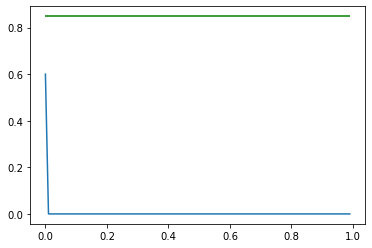

In [80]:
print(f)

plt.figure()
plt.plot(t, f)
plt.hlines((a/R)**(0.5*Q/(kappa*pi)), 0, t[-1], 'g')
plt.show()

## Final solution
Now that we have the eigenfunctions and $f(t)$ is approximated, we will build the final solution.  
  
First we linearly interpolate the discrete solution for $f(t)$:

In [81]:
# def f_interp(T):
#     if T< t[-1]:
#         for i in range(1,len(t)):
#             if t[i-1]<= T <= t[i]:
#                 return f[i] + (T-t[i-1])*(f[i]-f[i-1])
#     else:
#         return f[-1]
    
# def f_prime_interp(T):
#     if T< t[-1]:
#         for i in range(1,len(t)-1):
#             if t[i-1]<= T <= t[i]:
#                 return (f[i] - f[i-2])/(2*dt) + (T-t[i-1])* (f[i+1] - f[i-1])/(2*dt)
#     else:
#         return (f[-1] -f[-2])/dt


# Guess
time_constant = 0.1
def f_interp(T):
    eq1 = (a/R)**(0.5*Q/(kappa*pi))
    eq2 = (a/R)**(Q/(kappa*pi))
    return eq2 + (eq1-eq2)*np.exp(-time_constant*T)

def f_prime_interp(T):
    eq1 = (a/R)**(0.5*Q/(kappa*pi))
    eq2 = (a/R)**(Q/(kappa*pi))
    return -time_constant*(eq1-eq2)*np.exp(-time_constant*T)

Now we calulate $s(x,t)$ and $\zeta(x,t)$:

In [82]:
def psi(r,t):
    return (f_interp(t)-1)/(a-R)*r + (R*f_interp(t)-a)/(R-a)

def xi(x,t):
    return f_interp(t)*(1-x/L)

# initial conditions: ###  COPY  @@@

def ss0(x):
    return (a/R)**(0.5*Q/(kappa*pi))*(1-x/L)
    return (a/R)**(0.5*Q/(kappa*pi))*np.exp(-0.5*Q*x/(k*A))

def ss1(r):
    #return (1-(a/R)**(0.5*Q/(kappa*pi)))/(R-a)*r + 1-R*(1-(a/R)**(0.5*Q/(kappa*pi)))/(R-a)
    return (r/R)**(0.5*Q/(kappa*pi))

def u(x):
    return ss0(x) - xi(x,0)

def v(r):
    return ss1(r) - psi(r,0)

# def u(x):
#     return (a/R)**(0.5*Q/(kappa*pi))*np.exp(-2*Q*x/(k*A)) -(1-x/L)*(a/R)**(Q/(kappa*pi))*np.exp(-2*Q*x/(k*A))

# def v(r):
#     f = (a/R)**(0.5*Q/(kappa*pi))
#     return (r/R)**(0.5*Q/(kappa*pi)) - ((f-1)/(a-R)*r + (R*f-a)/(R-a))


In [83]:
def H(r,t):
    psi_t = f_prime_interp(t)*r/(a-R) + R*f_prime_interp(t)/(R-a)
    psi_rr = 0
    psi_r = (f_interp(t)-1)/(a-R)
    return -psi_t + kappa*psi_rr + (kappa-Q/pi)/r*psi_r

def Lf(x,t):
    xi_t = f_prime_interp(t)*(1-x/L)
    xi_xx = 0
    xi_x = -f_interp(t)/L
    return -xi_t + k*xi_xx + Q/A*xi_x


def h(tau,n):
    return integrate.quad(lambda r: H(r,tau)*phi_r_n(r,n), a, R)[0]

def l(tau,n):
    return integrate.quad(lambda x: Lf(x,tau)*phi_x_n(x,n), 0, L)[0]

def T0_r(n):
    return integrate.quad(lambda r: v(r)*phi_r_n(r,n), a, R)[0]/integrate.quad(lambda r: phi_r_n(r,n)**2, a, R)[0]

def T0_x(n):
    return integrate.quad(lambda x: u(x)*phi_x_n(x,n), 0, L)[0]/integrate.quad(lambda x: phi_x_n(x,n)**2, 0, L)[0]

def T_x(t,n):
    return np.exp(-labda_x_n(n)*t)*T0_x(n) + np.exp(-labda_x_n(n)*t) * integrate.quad(lambda tau: l(tau, n)*np.exp(labda_x_n(n)*tau), 0, t)[0]/integrate.quad(lambda x: phi_x_n(x,n)**2, 0, L)[0]

def T_r(t,n):
    return np.exp(-labda_r_n(n)*t)*T0_r(n) + np.exp(-labda_r_n(n)*t) * integrate.quad(lambda tau: h(tau, n)*np.exp(labda_r_n(n)*tau), 0, t)[0]/integrate.quad(lambda r: phi_r_n(r,n)**2, a, R)[0]

def sol_r(r,t):
    res = 0
    for i in range(1,N_r):
        res += T_r(t,i)*phi_r_n(r,i)
    return res + psi(r,t)

def sol_x(x,t):
    res = 0
    for i in range(1,N_x):
        res += T_x(t,i)*phi_x_n(x,i)
    return res + xi(x,t)